In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("Admission_Predict.csv")

df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df = df.drop(columns=['Serial No.'])

# Rename target column for clarity
df.rename(columns={"Chance of Admit ": "Chance_of_Admit"}, inplace=True)

# Convert Chance_of_Admit into binary label: 1 if >= 0.5 else 0
df['Admitted'] = df['Chance_of_Admit'].apply(lambda x: 1 if x >= 0.5 else 0)

# Drop the original regression target column
df.drop(columns=["Chance_of_Admit"], inplace=True)

df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [4]:
X = df[['GRE Score', 'CGPA']]  # input features
y = df['Admitted']            # target label


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [6]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

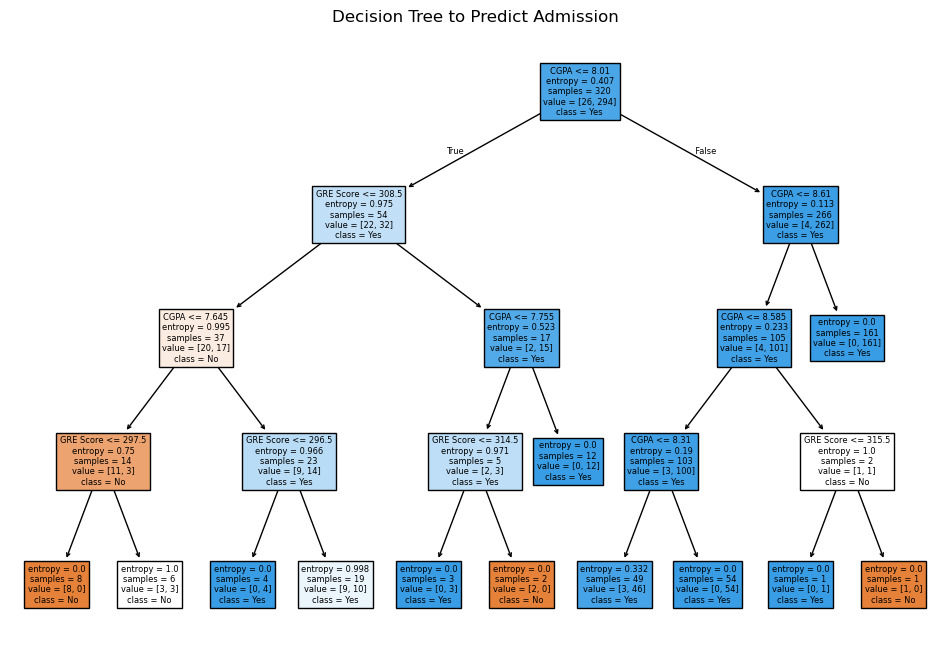

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['GRE Score', 'CGPA'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree to Predict Admission")
plt.show()


In [8]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.925

Confusion Matrix:
 [[ 3  4]
 [ 2 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.95      0.97      0.96        73

    accuracy                           0.93        80
   macro avg       0.77      0.70      0.73        80
weighted avg       0.92      0.93      0.92        80

